In [1]:
import json
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
models_parent_dir='/data/distribution_shift/models'

model_dirs=[f.path for f in os.scandir(models_parent_dir) if f.is_dir()]
model_dirs

['/data/distribution_shift/models/model08',
 '/data/distribution_shift/models/model06',
 '/data/distribution_shift/models/model04',
 '/data/distribution_shift/models/model11',
 '/data/distribution_shift/models/model12',
 '/data/distribution_shift/models/model01',
 '/data/distribution_shift/models/model02',
 '/data/distribution_shift/models/model10',
 '/data/distribution_shift/models/model05',
 '/data/distribution_shift/models/model07',
 '/data/distribution_shift/models/model03',
 '/data/distribution_shift/models/model09']

In [3]:
results=[['model_name', 'test_set_name','f1', 'exact_match']]
for model_dir in model_dirs:
    model_name = model_dir.split("/")[-1:][0]
    model_scores=[f.path for f in os.scandir(model_dir+'/results') if f.path.endswith('_score.json')]
    for model_score_path in model_scores:
        
        with open(model_score_path) as json_file:
            scores = json.load(json_file)
            
        test_set_name = model_score_path.split("/")[-1:][0].replace('_score.json', '')
        results.append([model_name, test_set_name, scores['f1'], scores['exact_match']])


In [4]:
results_csv = models_parent_dir+"/model_scores.csv"

with open(results_csv, mode='w') as employee_file:
    csv_writer = csv.writer(employee_file)
    csv_writer.writerows(results)

In [5]:
scores_df = pd.read_csv(results_csv)

scores_df.groupby('model_name')[["f1", "exact_match"]].mean()

,f1,exact_match
model_name,,
model01,64.749219,54.155052
model02,63.115796,52.612893
model03,59.030313,48.292636
model04,63.955340,52.243324
model05,53.315860,41.773198
model06,60.273949,49.759255
model07,47.414952,34.117467
model08,39.070464,30.550641
model09,39.070464,30.550641


In [6]:
scores_df.groupby('test_set_name')[["f1", "exact_match"]].mean()

,f1,exact_match
test_set_name,,
BioASQ,52.614272,38.015293
DROP,25.886498,17.742293
DuoRC,41.847205,33.277815
HotpotQApred,58.758574,43.008247
NaturalQuestions,60.665079,48.539265
NewsQA,46.122448,33.657803
RACE,29.403155,20.301682
RelationExtraction,75.603463,62.420850
SQuAD,69.408567,59.670537


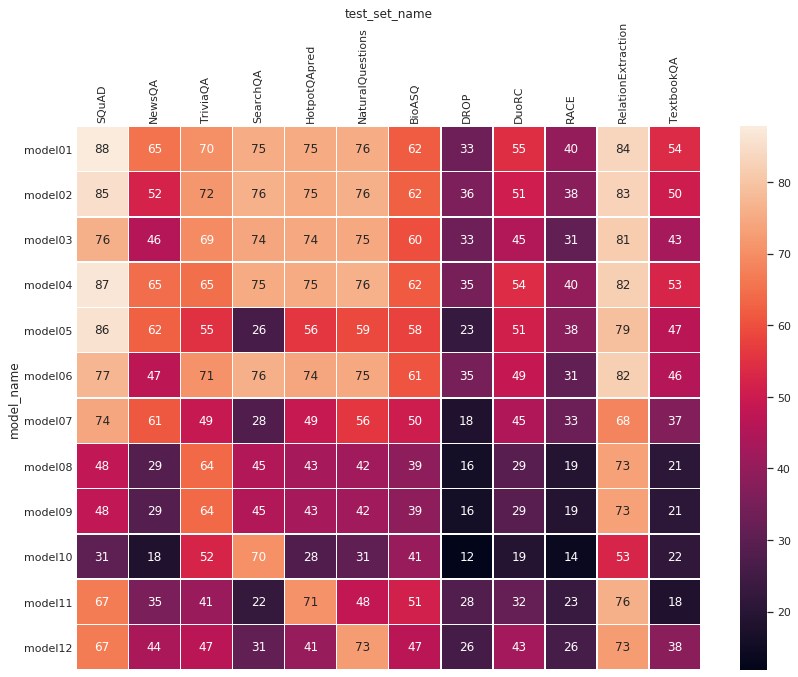

In [7]:
plt.figure(figsize=(14,10))

scores = scores_df.pivot("model_name", "test_set_name", "f1")

model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)

plt.show()

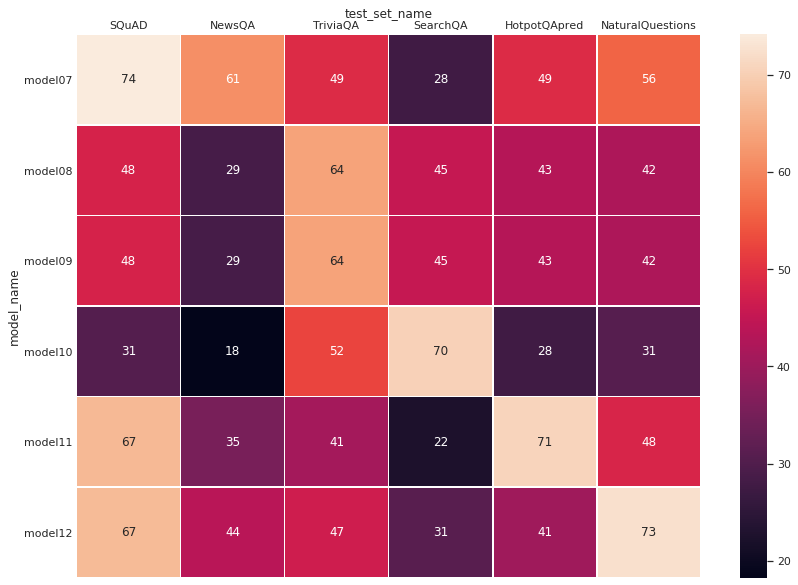

In [8]:
plt.figure(figsize=(14,10))

scores = scores_df.loc[scores_df['model_name'].isin(['model07', 'model08', 'model09', 'model10', 'model11', 'model12'])].pivot("model_name", "test_set_name", "f1")

# model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']
model_order=['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions']

# scores.loc[scores['model_name'] == 'model07']

ax = sns.heatmap(scores[model_order], annot=True,  linewidths=.5)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.show()

In [9]:
scores[['SQuAD', 'NewsQA', 'TriviaQA', 'SearchQA', 'HotpotQApred', 'NaturalQuestions', 'BioASQ', 'DROP', 'DuoRC', 'RACE', 'RelationExtraction', 'TextbookQA']]
scores

test_set_name,BioASQ,DROP,DuoRC,HotpotQApred,NaturalQuestions,NewsQA,RACE,RelationExtraction,SQuAD,SearchQA,TextbookQA,TriviaQA
model_name,,,,,,,,,,,,
model07,50.208119,18.214432,45.047831,49.131654,55.972728,61.237606,32.692773,68.282165,74.167153,27.797444,37.078984,49.148536
model08,38.994190,15.847023,29.370128,43.253154,42.149572,28.707356,19.177831,73.390622,47.775738,45.343074,20.960806,63.876076
model09,38.994190,15.847023,29.370128,43.253154,42.149572,28.707356,19.177831,73.390622,47.775738,45.343074,20.960806,63.876076
model10,40.757704,11.881023,19.173460,27.670855,30.844100,18.259500,14.011482,52.734790,30.555759,70.346514,21.773690,52.344409
model11,51.445311,28.053060,31.860205,70.815118,48.339233,35.491924,23.414306,75.952068,66.783238,22.464919,18.191682,41.162218
model12,46.827969,25.727691,42.940224,40.512202,72.554195,43.677922,25.875056,72.533989,67.008745,31.092040,38.027373,46.735513
